# CS146 Session 13.2 PCW 

## MCMC Algorithm 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as sts 

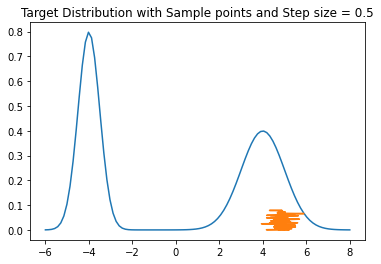

In [77]:
def target_pdf(x):
    """
    Create target distribution pdf 
    """
    return (sts.norm.pdf(x, loc = -4, scale = 0.5) + sts.norm.pdf(x, loc = 4, scale = 1))

def prop_dist(x0, step):
    """
    Create proposal distribution. Returns a newly proposed coordinate
    """
    return sts.norm.rvs(loc = x0, scale = step)

def acceptance(x, x0):
    
    return target_pdf(x)/target_pdf(x0)

x = np.linspace(-6, 8, 100)

step = 0.5
initial_step = np.random.choice(x)

data_x = []
data_y = [target_pdf(initial_step)] 

for i in range(100):
    current_step = initial_step
    next_step = prop_dist(initial_step, step)
    
    if np.random.uniform() < min(1, acceptance(next_step, initial_step)):
        
        current_step = next_step 
    
    data_x.append(current_step)
    data_y.append(target_pdf(current_step))


plt.plot(x, target_pdf(x))
plt.plot(data_x, abs(x)/sum(x))
plt.title("Target Distribution with Sample points and Step size = 0.5")
plt.show()


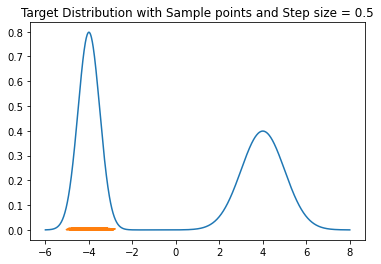

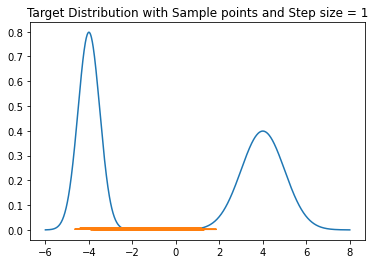

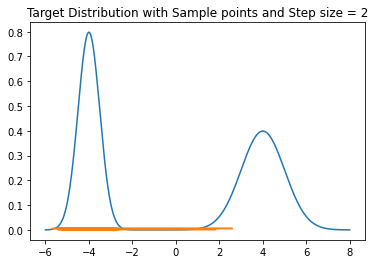

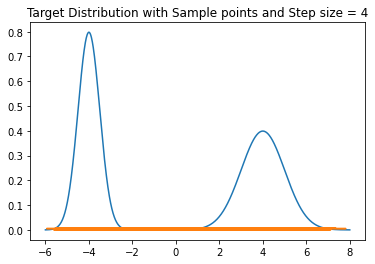

In [79]:
num_samples = 1000
steps = [0.5, 1, 2, 4]

x = np.linspace(-6, 8, num_samples)

acceptance_rates = []

for step in steps:
    initial_step = np.random.choice(x)

    data_x = []
    accept = 0

    for i in range(num_samples):
        current_step = initial_step
        next_step = prop_dist(initial_step, step)

        if np.random.uniform() < min(1, acceptance(next_step, initial_step)):

            current_step = next_step 
            accept += 1 

        data_x.append(current_step)
        data_y.append(target_pdf(current_step))

    plt.plot(x, target_pdf(x))
    plt.plot(data_x, abs(x)/sum(x))
    plt.title(f"Target Distribution with Sample points and Step size = {step}")
    plt.show()
    
    acceptance_rates.append(accept/num_samples)

    

In [81]:
for i in range(len(acceptance_rates)):
    print(f'Step Size = {steps[i]} with Acceptance rate = {acceptance_rates[i]}')



Step Size = 0.5 with Acceptance rate = 0.708
Step Size = 1 with Acceptance rate = 1.0
Step Size = 2 with Acceptance rate = 0.393
Step Size = 4 with Acceptance rate = 0.613


In [ ]:
def plot_acf(x):
    plt.acorr(x , ma)